<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/ImgProcessing/20210216__3_test_npy_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls /content/drive/MyDrive/urban_heat/data/singapore_ir/singapore_ir_npy/

singapore_ir_000000_000500.npy  singapore_ir_163000_163500.npy
singapore_ir_000500_001000.npy  singapore_ir_163500_164000.npy
singapore_ir_001000_001500.npy  singapore_ir_164000_164500.npy
singapore_ir_001500_002000.npy  singapore_ir_164500_165000.npy
singapore_ir_002000_002500.npy  singapore_ir_165000_165500.npy
singapore_ir_002500_003000.npy  singapore_ir_165500_166000.npy
singapore_ir_003000_003500.npy  singapore_ir_166000_166500.npy
singapore_ir_003500_004000.npy  singapore_ir_166500_167000.npy
singapore_ir_004000_004500.npy  singapore_ir_167000_167500.npy
singapore_ir_004500_005000.npy  singapore_ir_167500_168000.npy
singapore_ir_005000_005500.npy  singapore_ir_168000_168500.npy
singapore_ir_005500_006000.npy  singapore_ir_168500_169000.npy
singapore_ir_006000_006500.npy  singapore_ir_169000_169500.npy
singapore_ir_006500_007000.npy  singapore_ir_169500_170000.npy
singapore_ir_007000_007500.npy  singapore_ir_170000_170500.npy
singapore_ir_007500_008000.npy  singapore_ir_170500_171

In [ ]:
ls /content/drive/MyDrive/urban_heat/output/

20200313_0314_allday.npy          feat_bld37.npy
20200313_7pm_0314_4am_300th.npy   feat_bld_all.npy
20200313_9pm_0314_3am_all.npy     feat_sky_all.npy
20200314_7pm_0315_4am_1000th.npy  feat_win_all.npy
20200314_7pm_0315_4am_300th.npy   file_paths_times.feather
20200314_7pm_0315_4am_all.npy     paths_times_0313.csv
20200314_7pm_0315_4am.npy         paths_times_0314.csv
acs_pix_50.npy                    paths_times_0315.csv
acs_pix.npy                       paths_times.csv
bld_pix_150.npy                   sky_pix_150.npy
bld_pix.npy                       sky_pix_20201112.npy
feat_acs/                         sky_pix.npy
feat_acs0.npy                     sky_pix_rev.npy
feat_acs_all.npy                  win_pix_150.npy
feat_bld35.npy                    win_pix.npy
feat_bld36.npy


In [ ]:
fpaths = pd.read_feather("/content/drive/MyDrive/urban_heat/output/file_paths_times.feather", columns=None)
fpaths

,paths,times,fnames_npy
0,01-24/snap-2020-01-24T00-00-07.45.jpeg,2020-01-24 00:00:07.450,singapore_ir_npy/singapore_ir_000000_000500.npy
1,01-24/snap-2020-01-24T00-00-17.50.jpeg,2020-01-24 00:00:17.500,singapore_ir_npy/singapore_ir_000000_000500.npy
2,01-24/snap-2020-01-24T00-00-27.53.jpeg,2020-01-24 00:00:27.530,singapore_ir_npy/singapore_ir_000000_000500.npy
3,01-24/snap-2020-01-24T00-00-37.57.jpeg,2020-01-24 00:00:37.570,singapore_ir_npy/singapore_ir_000000_000500.npy
4,01-24/snap-2020-01-24T00-00-47.61.jpeg,2020-01-24 00:00:47.610,singapore_ir_npy/singapore_ir_000000_000500.npy
...,...,...,...
414748,03-15/snap-2020-03-15T23-59-11.49.jpeg,2020-03-15 23:59:11.490,singapore_ir_npy/singapore_ir_414500_415000.npy
414749,03-15/snap-2020-03-15T23-59-21.52.jpeg,2020-03-15 23:59:21.520,singapore_ir_npy/singapore_ir_414500_415000.npy
414750,03-15/snap-2020-03-15T23-59-31.56.jpeg,2020-03-15 23:59:31.560,singapore_ir_npy/singapore_ir_414500_415000.npy
414751,03-15/snap-2020-03-15T23-59-41.61.jpeg,2020-03-15 23:59:41.610,singapore_ir_npy/singapore_ir_414500_415000.npy


In [ ]:
fpaths.times[:300000]

0        2020-01-24 00:00:07.450
1        2020-01-24 00:00:17.500
2        2020-01-24 00:00:27.530
3        2020-01-24 00:00:37.570
4        2020-01-24 00:00:47.610
                   ...          
299995   2020-03-02 10:02:24.860
299996   2020-03-02 10:02:34.910
299997   2020-03-02 10:02:44.960
299998   2020-03-02 10:02:54.990
299999   2020-03-02 10:03:05.030
Name: times, Length: 300000, dtype: datetime64[ns]

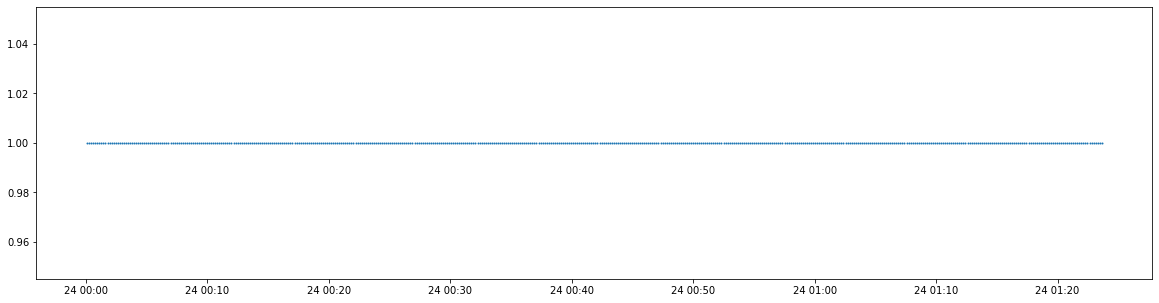

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(fpaths.times[:500], np.ones(500), ".", markersize=2)

In [ ]:
# -- set start and end time
st = "2020-01-25 19:00:00"
en = "2020-01-26 04:00:00"

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.times >= st) & (fpaths.times < en)]

# -- pull out times
times = fpaths_sub.times.values

# -- get the numpy file names
fnames_npy = np.unique(fpaths_sub.fnames_npy)

# -- initialize the imgs list
imgs = []

# -- read in each file
for ii, fname in enumerate(fnames_npy):
  print("reading file {0} ({1} of {2})".format(fname, ii + 1, len(fnames_npy)))

  # -- get indices only for those images we want to keep for this file
  ind = fpaths_sub[fpaths_sub.fnames_npy == fname].index % 500

  # -- append the kept images from this file to the images list
  imgs.append(np.load("/content/drive/MyDrive/urban_heat/data/singapore_ir/" + fname)[ind])

# -- concatentate to an array
imgs = np.concatenate(imgs, axis=0)

reading file singapore_ir_npy/singapore_ir_015000_015500.npy (1 of 8)
reading file singapore_ir_npy/singapore_ir_015500_016000.npy (2 of 8)
reading file singapore_ir_npy/singapore_ir_016000_016500.npy (3 of 8)
reading file singapore_ir_npy/singapore_ir_016500_017000.npy (4 of 8)
reading file singapore_ir_npy/singapore_ir_017000_017500.npy (5 of 8)
reading file singapore_ir_npy/singapore_ir_017500_018000.npy (6 of 8)
reading file singapore_ir_npy/singapore_ir_018000_018500.npy (7 of 8)
reading file singapore_ir_npy/singapore_ir_018500_019000.npy (8 of 8)


In [ ]:
imgs.shape

(3225, 240, 320)

In [ ]:
times

array(['2020-01-25T19:00:08.610000000', '2020-01-25T19:00:18.660000000',
       '2020-01-25T19:00:28.690000000', ...,
       '2020-01-26T03:59:31.360000000', '2020-01-26T03:59:41.410000000',
       '2020-01-26T03:59:51.450000000'], dtype='datetime64[ns]')

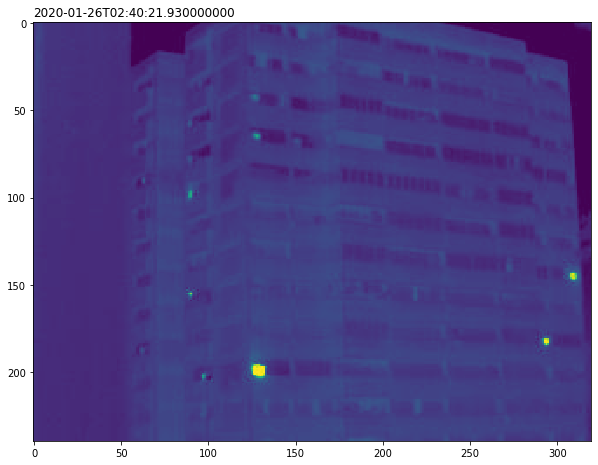

In [ ]:
# -- let's plot an image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imgs[2749], interpolation="nearest")
ax.set_title(times[2749], loc="left")
fig.show()

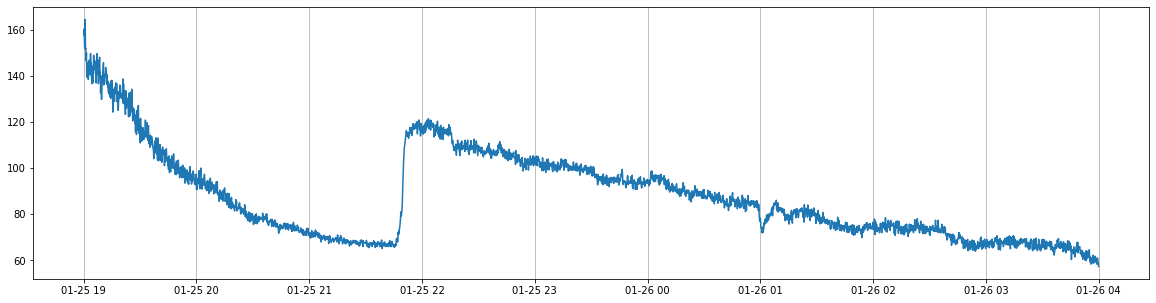

In [ ]:
# -- plot a time series
wid = 2
irow = 155
icol = 90
ts = imgs[:, irow-wid:irow+wid+1, icol-wid:icol+wid+1].mean(axis=(1, 2))

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(times, ts)
ax.grid(True, axis="x")
fig.show()

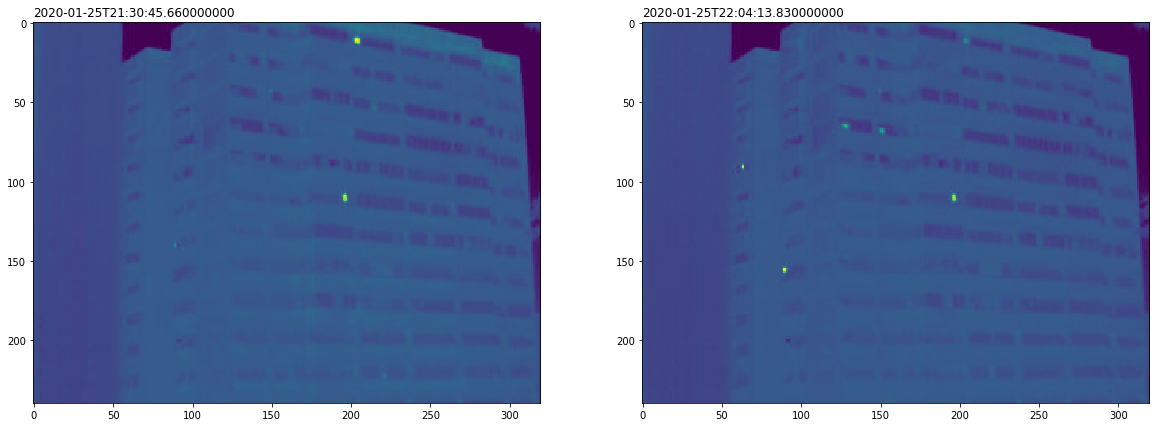

In [ ]:
# -- let's plot an image
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(imgs[900], interpolation="nearest")
ax[0].set_title(times[900], loc="left")
ax[1].imshow(imgs[1100], interpolation="nearest")
ax[1].set_title(times[1100], loc="left")
fig.show()

In [ ]:
fpaths_sub.index % 500

Int64Index([418, 419, 420, 421, 422, 423, 424, 425, 426, 427,
            ...
            133, 134, 135, 136, 137, 138, 139, 140, 141, 142],
           dtype='int64', length=3225)

In [ ]:
fname = fnames_npy[0]

In [ ]:
#ind = fpaths_sub[fpaths_sub.fnames_npy == fname].index % 500
#imgs.append(np.load("/content/drive/MyDrive/urban_heat/data/singapore_ir/" + fname)[ind])

In [ ]:
fpaths_sub[fpaths_sub.fnames_npy == fname].index % 500

Int64Index([418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
            431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
            444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456,
            457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
            470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482,
            483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495,
            496, 497, 498, 499],
           dtype='int64')

In [ ]:
fpaths[fpaths.fnames_npy == fname]

,paths,times,fnames_npy
15000,01-25/snap-2020-01-25T17-50-11.19.jpeg,2020-01-25 17:50:11.190,singapore_ir_npy/singapore_ir_015000_015500.npy
15001,01-25/snap-2020-01-25T17-50-21.22.jpeg,2020-01-25 17:50:21.220,singapore_ir_npy/singapore_ir_015000_015500.npy
15002,01-25/snap-2020-01-25T17-50-31.26.jpeg,2020-01-25 17:50:31.260,singapore_ir_npy/singapore_ir_015000_015500.npy
15003,01-25/snap-2020-01-25T17-50-41.31.jpeg,2020-01-25 17:50:41.310,singapore_ir_npy/singapore_ir_015000_015500.npy
15004,01-25/snap-2020-01-25T17-50-51.35.jpeg,2020-01-25 17:50:51.350,singapore_ir_npy/singapore_ir_015000_015500.npy
...,...,...,...
15495,01-25/snap-2020-01-25T19-13-01.85.jpeg,2020-01-25 19:13:01.850,singapore_ir_npy/singapore_ir_015000_015500.npy
15496,01-25/snap-2020-01-25T19-13-11.89.jpeg,2020-01-25 19:13:11.890,singapore_ir_npy/singapore_ir_015000_015500.npy
15497,01-25/snap-2020-01-25T19-13-21.93.jpeg,2020-01-25 19:13:21.930,singapore_ir_npy/singapore_ir_015000_015500.npy
15498,01-25/snap-2020-01-25T19-13-31.96.jpeg,2020-01-25 19:13:31.960,singapore_ir_npy/singapore_ir_015000_015500.npy


In [ ]:
fnames_npy = np.unique(fpaths.fnames_npy[800:1400])

In [ ]:
imgs = []

for fname in fnames_npy:
  imgs.append(np.load("/content/drive/MyDrive/urban_heat/data/singapore_ir/" + fname))

In [ ]:
fnames_npy

array(['singapore_ir_npy/singapore_ir_000500_001000.npy',
       'singapore_ir_npy/singapore_ir_001000_001500.npy'], dtype=object)

In [ ]:
imgs = np.concatenate(imgs, axis=0)

In [ ]:
imgs.shape

(1000, 240, 320)

In [ ]:
foo = np.load("/content/drive/MyDrive/urban_heat/data/singapore_ir/" + fnames_npy[0])

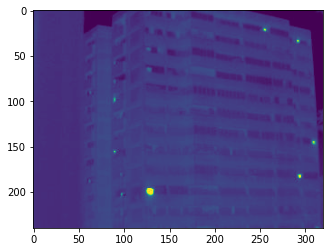

In [ ]:
plt.imshow(foo[0])